#### Procesamiento Digital de Señales

# Tarea Semanal 3

#### Por Nahuel Braian Contreras

Simulo la salida del ADC, y la comparo con la señal orignal, para ver cunato varia.

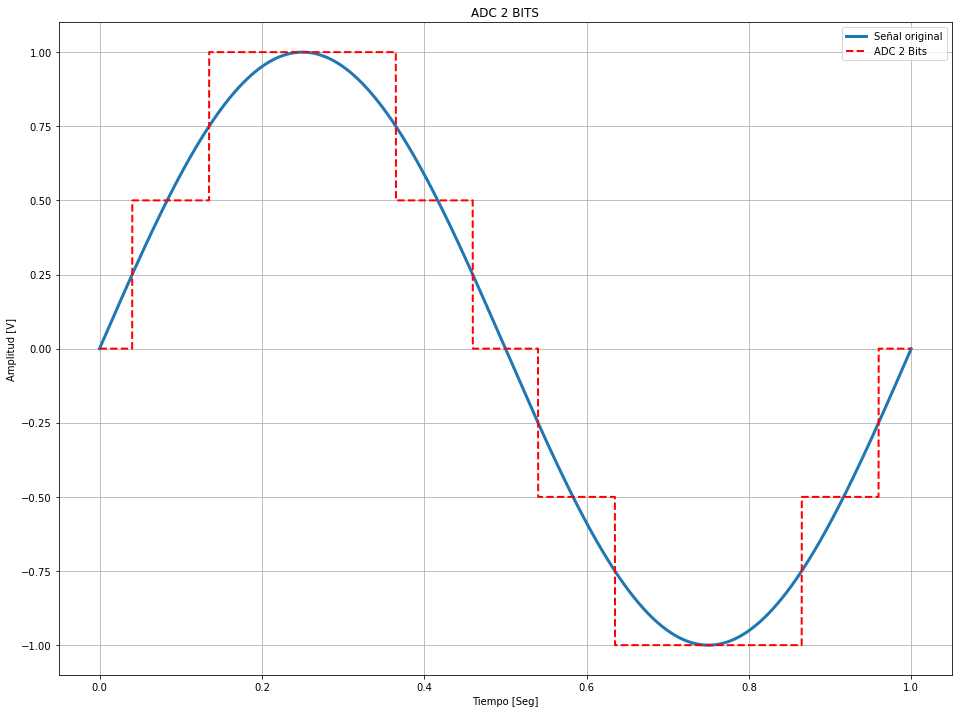

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def my_senoidal (N, freq_M, amplitud = 1, valor_medio = 0, freq = 1, fase = 0):
    
    ts = 1/freq_M
    
    tt = np.linspace(0, (N-1)*ts, N)
    
    xx = amplitud * np.sin(2*np.pi*(freq)*tt + fase) + valor_medio
    
    return(tt,xx)

def my_ADC(Sr, B, Vref):
    
    #q = 2*Vref/((2**B)-1) # LSB
    q = Vref/(2**(B-1)) # LSB
    
    Sq = q * np.round(Sr/q)
    
    return Sq
    
fs = 10000 # frecuencia de muestreo
N = 10000  # cantidad de muestras
freq = 1
DC = 0

# ADC
B = 2# Bits
Vref = 1 # Voltaje de referencia

[t, Sr] = my_senoidal(N,fs,Vref,DC,freq) # creo mi señal senoidal

Sq = my_ADC(Sr,B,Vref)

fig, ax = plt.subplots(nrows=1 , ncols=1)
fig.set_size_inches(16,12)
ax.plot(t,Sr,linewidth = 3, label = 'Señal original')
ax.set_title('ADC 2 BITS')
ax.plot(t,Sq, color = 'red',linestyle='dashed',linewidth = 2, label = 'ADC 2 Bits')
ax.set_ylabel('Amplitud [V]')
ax.set_xlabel('Tiempo [Seg]')
ax.grid()
ax.legend()

Ahora probaremos para una Vref = 2, e iremos variando la cantidad de Bits del ADC. Lo que esparamos ver es que a medida que aumenta la cantidad de B, la señal del ADC se va pareciendo cada vez mas a la del ADC

### 4 Bits

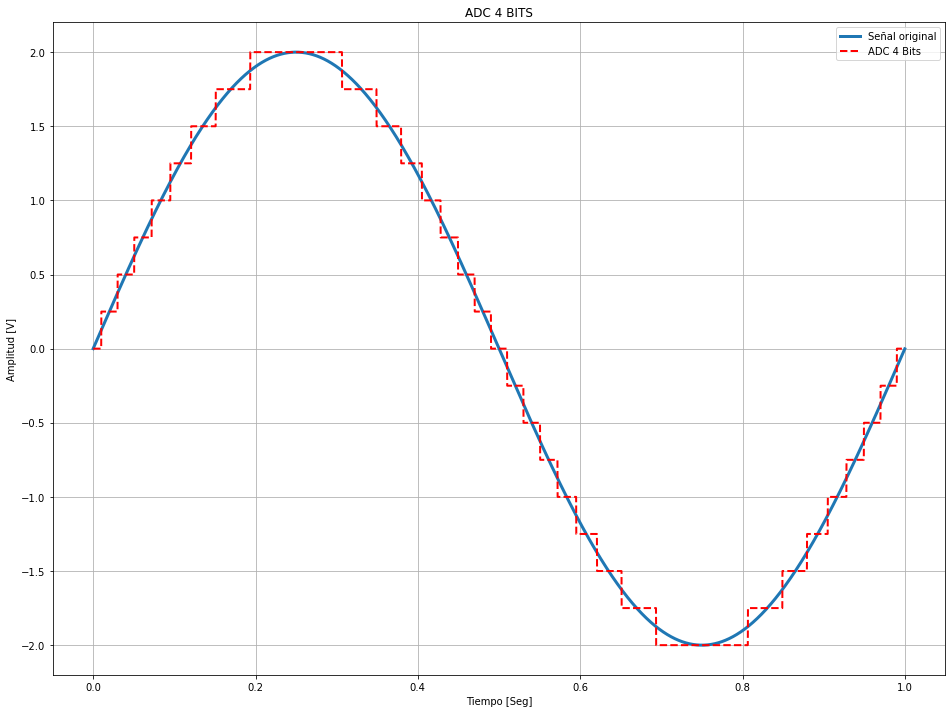

In [21]:
B = 4# Bits
Vref = 2 # Voltaje de referencia

[t, Sr] = my_senoidal(N,fs,Vref,DC,freq) # creo mi señal senoidal

Sq = my_ADC(Sr,B,Vref)

fig, ax = plt.subplots(nrows=1 , ncols=1)
fig.set_size_inches(16,12)
ax.plot(t,Sr,linewidth = 3, label = 'Señal original')
ax.plot(t,Sq, color = 'red',linestyle='dashed',linewidth = 2, label = 'ADC 4 Bits')
ax.set_title('ADC 4 BITS')
ax.set_ylabel('Amplitud [V]')
ax.set_xlabel('Tiempo [Seg]')
ax.grid()
ax.legend()

### 8 Bits

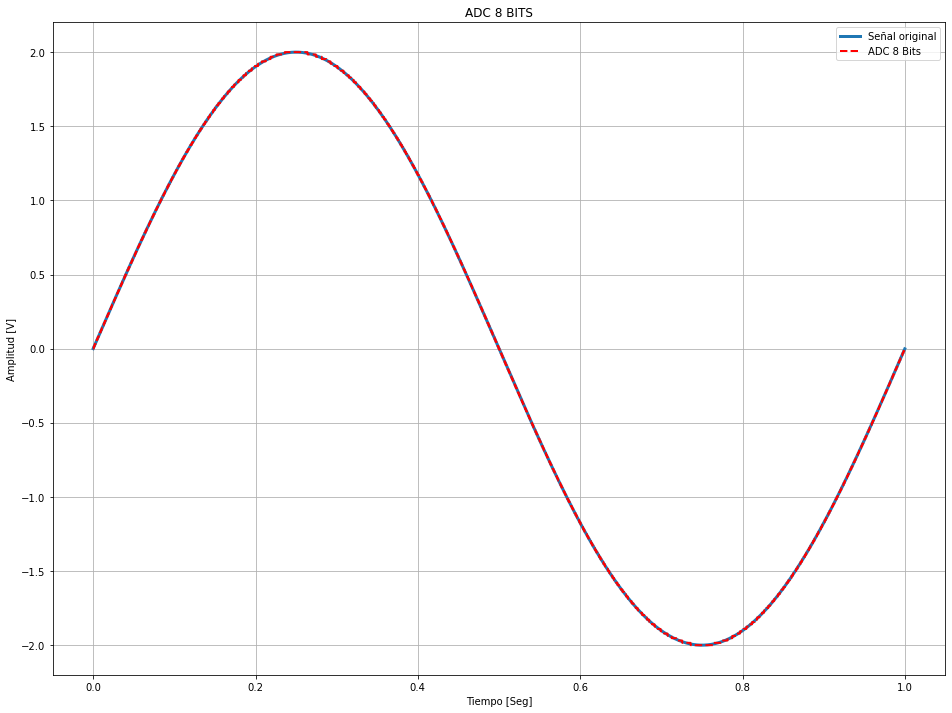

In [22]:
B = 8 # Bits
Vref = 2 # Voltaje de referencia

[t, Sr] = my_senoidal(N,fs,Vref,DC,freq) # creo mi señal senoidal

Sq = my_ADC(Sr,B,Vref)

fig, ax = plt.subplots(nrows=1 , ncols=1)
fig.set_size_inches(16,12)
ax.plot(t,Sr,linewidth = 3, label = 'Señal original')
ax.plot(t,Sq, color = 'red',linestyle='dashed',linewidth = 2, label = 'ADC 8 Bits')
ax.set_title('ADC 8 BITS')
ax.set_ylabel('Amplitud [V]')
ax.set_xlabel('Tiempo [Seg]')
ax.grid()
ax.legend()

### 16 Bits

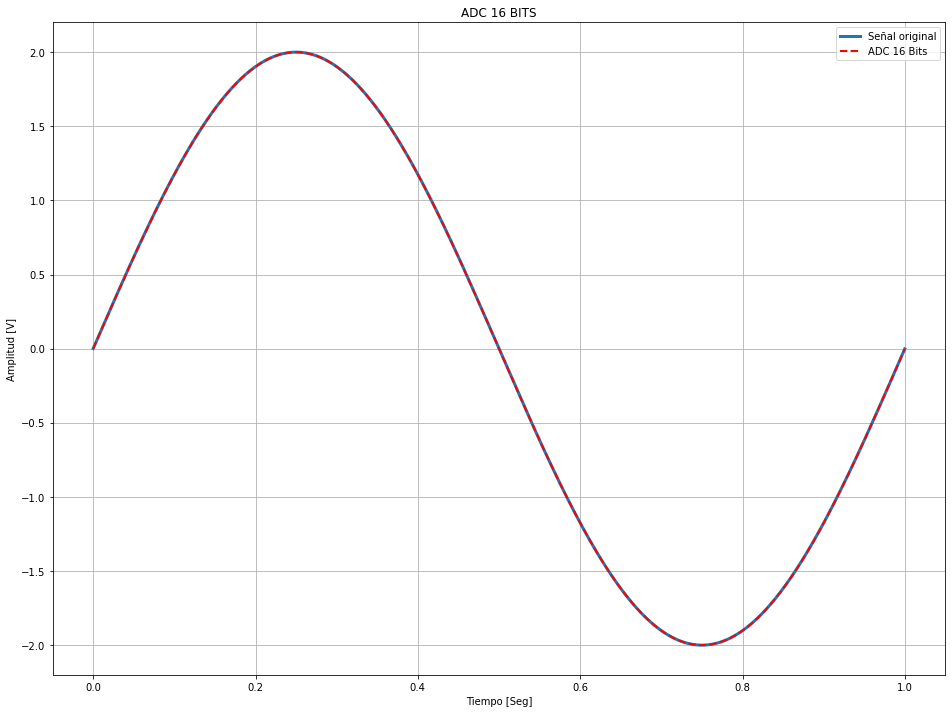

In [23]:
B = 16 # Bits
Vref = 2 # Voltaje de referencia

[t, Sr] = my_senoidal(N,fs,Vref,DC,freq) # creo mi señal senoidal

Sq = my_ADC(Sr,B,Vref)

fig, ax = plt.subplots(nrows=1 , ncols=1)
fig.set_size_inches(16,12)
ax.plot(t,Sr,linewidth = 3, label = 'Señal original')
ax.plot(t,Sq, color = 'red',linestyle='dashed',linewidth = 2, label = 'ADC 16 Bits')
ax.set_title('ADC 16 BITS')
ax.set_ylabel('Amplitud [V]')
ax.set_xlabel('Tiempo [Seg]')
ax.grid()
ax.legend()

Ahora vamos a ver como se ve el error que tenemos entre nuestra señal original y la del adc

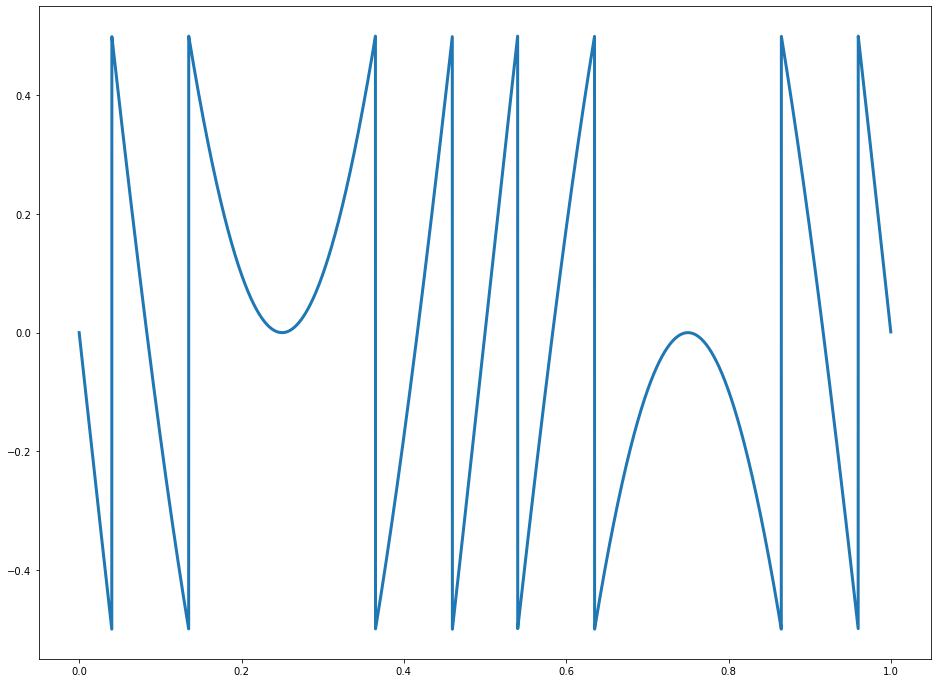

In [24]:
B = 2# Bits
q = Vref/(2**(B-1)) #LSB
[t, Sr] = my_senoidal(N,fs,Vref,DC,freq) 
Sq = my_ADC(Sr,B,Vref)

e = (Sq - Sr)/q # Error normalizado por q
fig, ax = plt.subplots(nrows=1 , ncols=1)
fig.set_size_inches(16,12)
ax.plot(t,e,linewidth = 3)

Tiene una forma periodica, por lo tanto es deterministica. En la realidad esto no sucede asi ya que tenemos un piso de ruido analogico en nuestra señal. Esto la podemos simular agregando un ruido con distribucion normal de varianza = q/2  

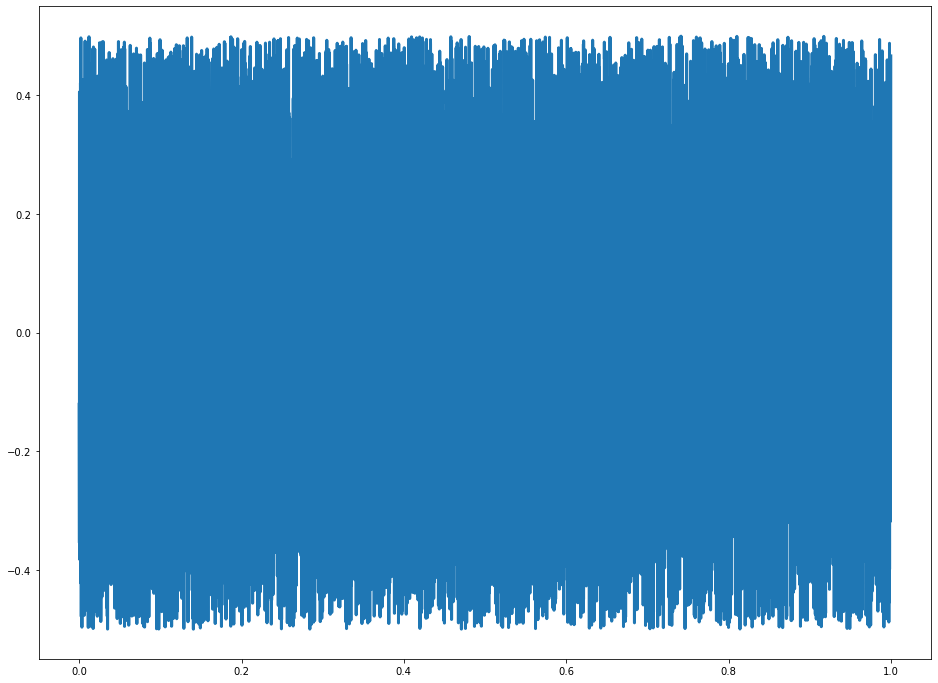

In [25]:
sigma = q/2


noise = sigma * np.random.randn(len(t))

Sr = Sr + noise

Sq = my_ADC(Sr,B,Vref)

e = (Sq - Sr)/q # Error normalizado por q
fig, ax = plt.subplots(nrows=1 , ncols=1)
fig.set_size_inches(16,12)
ax.plot(t,e,linewidth = 3)

Ahora si tiene una distribución mas aleatoria. Lo que podemos hacer es ver su histograma normlizado, para ver si el error es uniforme o no. Recordar que el ruido analogico agregado tiene una distribución normal gaussiana.

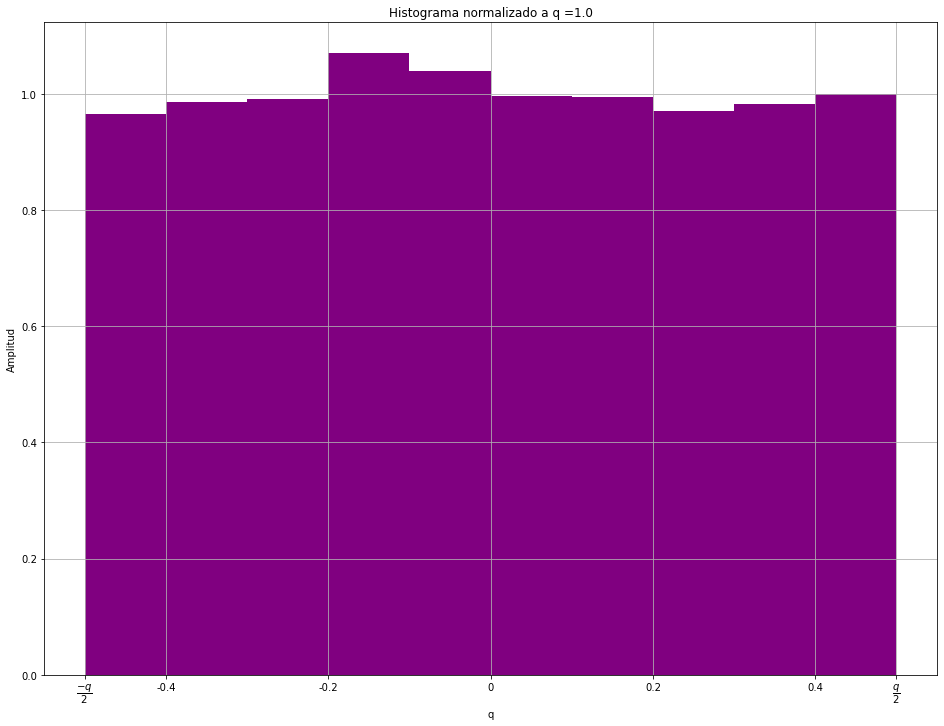

In [26]:
fig, ax = plt.subplots(nrows=1 , ncols=1)
fig.set_size_inches(16,12)
ax.hist(e, density=True, color = 'purple') # con density = true esta normalizado
ax.set_title('Histograma normalizado a q ={}'.format(q))
ax.set_ylabel('Amplitud')
ax.set_xlabel('q')
ax.set_xticks([-0.5, -0.4, -0.2, -0.0, 0.2, 0.4, 0.5])
ax.set_xticklabels(['$\dfrac{-q}{2}$','-0.4','-0.2','0','0.2','0.4','$\dfrac{q}{2}$'])
ax.grid()

Podemos ver que el error se encuentra comprendido entre -q/2 y q/2 (normalizado). Tambien que la amplitud es aproxidamente **uniforme** para todas las columnas.

Tambien podemos analizar la autocorrelación del mismo. Tendriamos que esperar que se encuentre fuertemente incorrelado

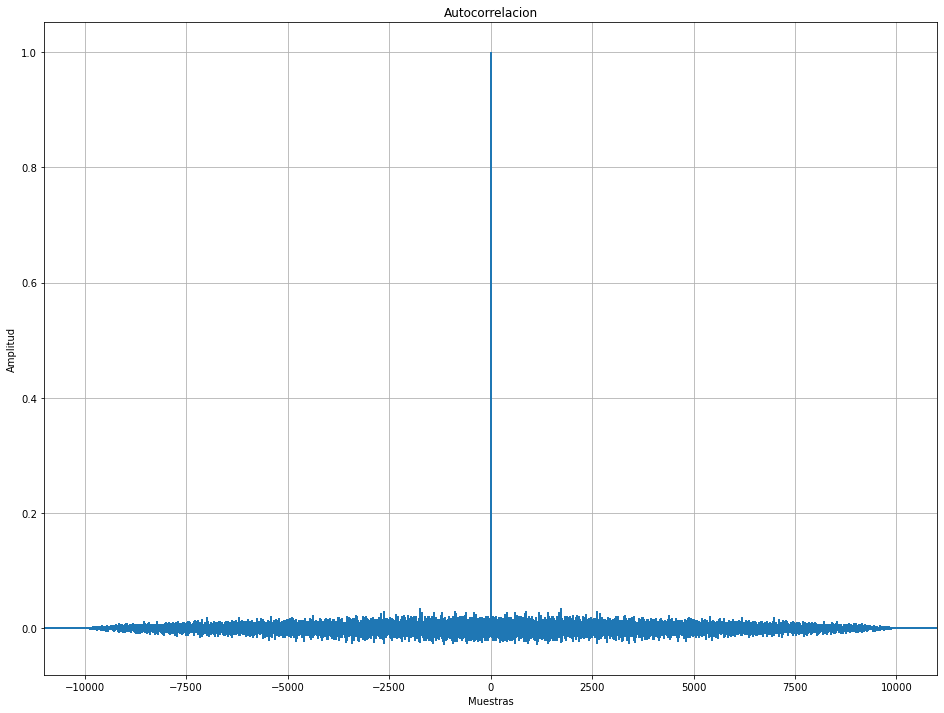

In [27]:
fig, ax = plt.subplots(nrows=1 , ncols=1)
ax.set_title('Autocorrelacion')
ax.set_ylabel('Amplitud')
ax.set_xlabel('Muestras')
fig.set_size_inches(16,12)
ax.acorr(e, usevlines=True, normed=True, maxlags = N-1, lw=2)
ax.grid(True)

Vemos que solo tenemos una correlacion para la muestra inicial, despues posee muy baja autocorrelación para las siguientes muestras, esperable de un ruido del tipo blanco gaussiano.

**A continuacion analizaremos algunos valores estadisticos.**

### Media

In [28]:
print("La media de la señal de error es de {:.2f}".format(np.mean(e)))

La media de la señal de error es de -0.00


### Varianza

In [29]:
print("La varianza de la señal de error es de {:.5f}\n".format(np.var(e)))

La varianza de la señal de error es de 0.08212



Una cosa interesante de la varianza del error es que tambien coincide con el valor de su **potencia**

In [30]:
Potencia = sum(e**2)/N
print("La Potencia de la señal de error es de {:.5f}".format(Potencia))

La Potencia de la señal de error es de 0.08212


### Desvio estandar
Calcularemos el desvio estandar de la señal original sin sumarle el error.

In [31]:
fs = 10000 # frecuencia de muestreo
N = 10000   # cantidad de muestras
freq = 1
DC = 2

# ADC
B = 2# Bits
Vref = 1 # Voltaje de referencia
q = Vref/(2**(B-1)) #LSB
[t, Sr] = my_senoidal(N,fs,Vref,DC,freq) 

sigma = q/2
noise = 0
Sr = Sr + noise
Sq = my_ADC(Sr,B,Vref)
e = (Sq - Sr)/q # Error normalizado por q

In [32]:
print("El desvio estandar de la error es de {:.5f}".format(np.std(Sr)))

El desvio estandar de la error es de 0.70711


Ahora procederemos a calcular el valor RMS de mi senoidal de origen.

In [33]:
print("El valor RMS de mi señal de entrada es de {:.5f}".format(Vref/np.sqrt(2)))

El valor RMS de mi señal de entrada es de 0.70711


Podemos notar que coinciden en el valor